## Método de Euler
Es uno de los métodos numéricos más simples para aproximar soluciones de problemas con valores iniciales de primer orden:
$$ y_{n+1} = y_{n} + h*f(x_{n}, y_{n}) $$
donde $f$ es la función obtenida de la ecuación diferencial $y^{\prime} = f(x, y)$.
A continuación veremos el código en python; primero importamos las librerías necesarias:

In [59]:
#Importamos las librerias
from matplotlib import pyplot as plt #Libreria para graficar, muy similar al matlab
import numpy as np # Libreria para trabajar con matrices y algunas expresiones matematicas
import pandas as pd # Libreria para trabajar con dataframes
import scipy as sp # Libreria para trabajar con funciones matematicas
from matplotlib import style # Libreria para estilos de graficos
plt.style.use(['science', 'notebook']) # Estilo de graficos


 Definimos una función con el algorítmo de recurrencia, la cual devuelve dos listas, x e y:

In [60]:
# esta toma como parametros, la función, el valor inicial de x, el valor inicial de y, , el valor de h y el valor final de x (xf)
def euler(funcion, x0, y0, h, xf):
    x = [x0] # Inicializamos la lista x
    y = [y0] # Inicializamos la lista y
    n = int((xf - x0) / h) # Calculamos el numero de iteraciones
    for i in range(1,n+1): # Iteramos el numero de iteraciones
        xi = x[i-1] + h # Calculamos el valor de xi, que es el valor de x anterior mas el valor de h
        yi = y[i-1] + h * funcion(x[i-1], y[i-1]) # Calculamos el valor de yi, que es el valor de y anterior mas el valor de h multiplicado por la funcion evaluada en el punto anterior
        x.append(xi) # Agregamos el valor de xi a la lista x
        y.append(yi) # Agregamos el valor de yi a la lista y
    # El siguiente bucle es para mostrar los valores de x e y
    #for i in range(len(x)): # Iteramos la lista x
        #print(x[i], y[i]) # Imprimimos los valores de x e y
    # Retornamos los valores de x e y
    return x, y


### Ejemplo 1:
Resolvemos $$y^{\prime} = 1-x+4y$$
Definimos la función $f(x, y) = 1-x+4y$:

In [61]:
# Definimos la función (que depende de x e y) a evaluar en el método de Euler antes definido:
funcion1 = lambda x,y: 1-x+4*y

finalmente llamamos a la función de Euler:

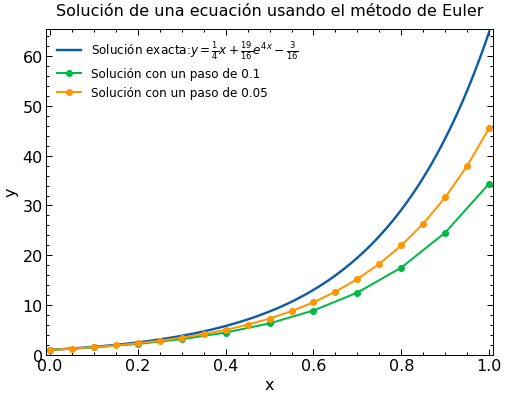

In [62]:
# Como la función de Euler retorna una lista de valores de x e y, asignamos dichas listas a las variables x e y
x = np.linspace(0,1,100) # Creamos una lista de valores de x
y = x*1/4-3/16+19/16*np.exp(4*x) # Calculamos la lista de valores de y
plt.title('Solución de una ecuación usando el método de Euler', fontsize = 16, pad = 14) # Agregamos el titulo, pad es para el espacio entre el titulo y la gráfica
plt.plot(x,y, linewidth = 2.4) # Graficamos la lista de valores de x e y
x1, y1 = euler(funcion1, 0, 1, 0.1, 1)
# Graficamos los valores de x e y
plt.plot(x1, y1, 'o-')
# Para un paso de 0.05 se obtiene:
x2, y2 = euler(funcion1, 0, 1, 0.05, 1)
plt.plot(x2, y2, 'o-')
# list para la leyenda de las graficas	
leyenda = [r'Solución exacta:$y = \frac{1}{4}x+\frac{19}{16}e^{4x}-\frac{3}{16}$', 'Solución con un paso de 0.1', 'Solución con un paso de 0.05']
plt.axis([-0.008, 1.008, -0.01, 65.5]) # Establecemos los ejes de la gráfica
plt.xlabel('x') # Agregamos el nombre de x
plt.ylabel('y') # Agregamos el nombre de y
#plt.grid(True) # Agregamos la grilla
plt.legend(leyenda, fontsize = 12) # Agregamos la leyenda
# Para guardar la gráfica
#plt.savefig('euler_y_euler_mejorado.eps') # Guardamos la gráfica



### Ejemplo 2
Resolver $$y^{\prime} =2y-1$$
$$x(0)=0$$
$$y(0) = 1$$
Con solución exacta: $y = 0.5+0.5e^{2x}$
Notamos que $f(x,y) = 2y-1$, la definimos:

In [63]:
funcion3 = lambda x,y: 2*y-1

Llamamos a la función de Euler:

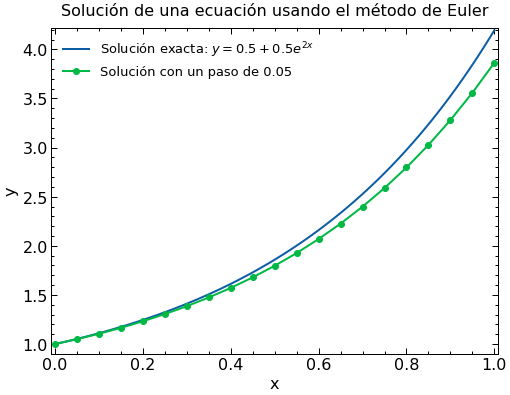

In [64]:
x = np.linspace(0,1,100)
y = 0.5+0.5*np.exp(2*x)
plt.title('Solución de una ecuación usando el método de Euler', fontsize = 16, pad = 13)
plt.plot(x,y)
x1, y1 = euler(funcion3, 0, 1, 0.05, 1)
plt.plot(x1, y1, 'o-')
plt.axis([-0.008, 1.008, 0.9, 4.22])
plt.xlabel('x')
plt.ylabel('y')
leyenda = [r'Solución exacta: $y = 0.5+0.5e^{2x}$', 'Solución con un paso de 0.05']
plt.legend(leyenda, fontsize = 13)

### Ejemplo 3
Efecto de la resistencia del aire en el movimiento parabólico. Las condiciones iniciales: $x(0) = y(0) = 0$, $v_{x}(0) = v_{0x} = v_{0} \cos(\theta)$ y $v_{0y}= v_{0}sen(\theta)$.

$$ v_{x}(t) = v_{0x}e^{-kt} $$
$$ v_{y}(t) = \left ( v_{0y}+\dfrac{g}{k} \right)e^{-kt}-\dfrac{g}{k} $$
$$ x(t) = \dfrac{v_{0x}}{k}(1-e^{-kt}) $$
$$ y(t) = \dfrac{1}{k} \left ( v_{0y}+\dfrac{g}{k} \right ) (1-e^{-kt})-\dfrac{g}{k}t$$
- Programar las ecuaciones de arriba tal como antes, la única diferencia es que el usuario debe ingresar el valor de la constante $k$.
- Como test use: $k = 5$, $v_{0} = 10m/s$, $\theta = \frac{\pi}{4}$, $dt = 0.04, \ 0.01$. Con un tiempo de vuelo iguala $0.91s$

Primero definimos el tiempo de vuelo en un vector 

In [65]:
dt = 0.01
tiempo = np.arange(0,0.91+dt,dt)

definimos las constantes y luego los vectores $v_{x}(t)$ y $v_{y}(t)$:

In [66]:
k = int(input('Ingrese el valor de k: '))

gravedad = 9.8 # Valor de la gravedad
vo = 10 # m/s
angulo = np.pi/4 # valor de theta en radianes

# velocidades:
vx_t = vo*np.exp(-k*tiempo) # velocidad en x
vy_t = (vo*np.sin(angulo) + gravedad/k)*np.exp(-k*tiempo)-gravedad/tiempo # velocidad en y


C:\Users\JHERSO~1\AppData\Local\Temp/ipykernel_3284/1985231169.py:9: RuntimeWarning: divide by zero encountered in true_divide
  vy_t = (vo*np.sin(angulo) + gravedad/k)*np.exp(-k*tiempo)-gravedad/tiempo # velocidad en y


Luego obtenemos las listas de la posición:

In [67]:
x_t = (1-np.exp(-k*tiempo))*vo*np.cos(angulo)/k # posicion en x
y_t = (1-np.exp(-k*tiempo))*(vo*np.sin(angulo) + gravedad/k)/k - gravedad*tiempo/k # posicion en y
#plt.plot(x_t,y_t, '-')

Posiciones sin resistencia del aire:

In [68]:
ym = vo*np.sin(angulo)*tiempo - gravedad*tiempo**2**0.5
y1 = [y for y in ym if y >= 0]
xm = vo*np.cos(angulo)*tiempo
x1 = []
for i in range(len(y1)):
    x1.append(xm[i])

Graficamos:

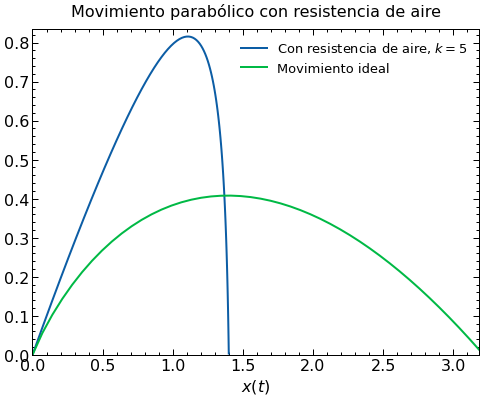

In [69]:
plt.title('Movimiento parabólico con resistencia de aire', fontsize = 16, pad = 13)
plt.plot(x_t,y_t, '-')
plt.plot(x1,y1, '-')
leyenda = [r'Con resistencia de aire, $k=5$', 'Movimiento ideal']
plt.xlabel(r'$x(t)$')
plt.axis([0, x1[len(x1)-1], min(x1), max(y_t)+0.02])
plt.legend(leyenda, fontsize = 13, loc = 'upper right')


## Método de Euler mejorado:
Es un método numérico definido por la fórmula:

$$ y_{n+1} = y_{n}+\frac{h}{2} \left [ \dfrac{f(x_{n}, \ y_{n})+f(x_{n+1}, \ y^{*}_{n+1})}{2} \right ] $$
Donde:
$$ y^{*}_{n+1} = y_{n} + hf(x_{n}, \ y_{n}) $$
Implementamos el algorítmo en python:

In [70]:
# Definimos una función que devuelve los valores de x e y
def eulerMejorado(funcion2, x0, y0, h, xf):
    x = [x0] # Inicializamos la lista x
    y = [y0] # Inicializamos la lista y
    n = int((xf - x0) / h) # Calculamos el numero de iteraciones
    for i in range(1,n+1): # Iteramos el numero de iteraciones
        xi = x[i-1] # Calculamos el valor de xi, que es el valor de x anterior
        yi = y[i-1] # Calculamos el valor de yi, que es el valor de y anterior
        yi = yi +h/2*(funcion2(xi,yi) + funcion2(xi+h,yi+h*funcion2(xi,yi))) # Aplicamos la fórmula de Euler mejorada
        x.append(xi+h) # Agregamos el valor de xi a la lista x
        y.append(yi) # Agregamos el valor de yi a la lista y
    # El siguiente bucle es para mostrar los valores de x e y    
    for i in range(len(x)): # Iteramos la lista x
        print(x[i], y[i]) # Imprimimos los valores de x e y
    # Retornamos los valores de x e y
    return x, y

Definimos la función a evaluar:

In [71]:
funcion2 = lambda x,y: 1-x+4*y

LLamamos a la función de Euler:

1 1
1.1 1.475
1.2000000000000002 2.1660000000000004
1.3000000000000003 3.1766800000000006
1.4000000000000004 4.660486400000001
1.5000000000000004 6.844519872000001


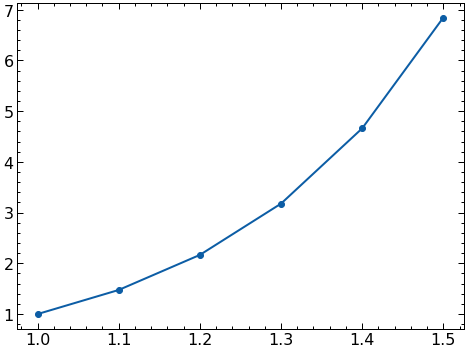

In [72]:
# Como la función de Euler retorna una lista de valores de x e y, asignamos dichas listas a las variables x e y
x, y = eulerMejorado(funcion2, 1, 1, 0.1, 1.5)
# Graficamos los valores de x e y
plt.plot(x, y, 'o-')

### Atractor de Lorenz
El famoso *sistema de Lorenz* de ecuaciones diferenciales está dado por:

\begin{equation} 
\begin{split}
\frac{dx}{dt} & = - \sigma x + \sigma y \\
\frac{dy}{dt} & = \rho x - y - xz \\
\frac{dz}{dt} & = -\beta z + xy
\end{split}
\end{equation}




In [73]:
beta = 8./3.
sigma = 10
rho = 28

In [74]:
def lorenz(x,y, z):
    u = -sigma*x+sigma*y
    v = rho*x-y-x*z
    w = -beta*z+x*y
    return u, v, w

In [75]:
xo = -8
yo = 8
zo = 27

In [76]:
xs = [xo]
ys = [yo]
zs = [zo]

In [77]:
dt = 0.01
tiempo = np.arange(0,600+dt,dt)

In [78]:
for i in range(6000):
    x_derivada, y_derivada, z_derivada = lorenz(xs[i], ys[i], zs[i])
    xs.append(xs[i]+x_derivada*dt)
    ys.append(ys[i]+y_derivada*dt)
    zs.append(zs[i]+z_derivada*dt)
    

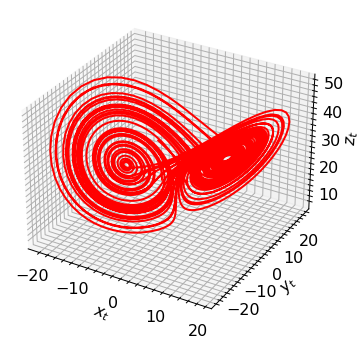

In [88]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection ='3d')
ax.set_xlabel(r'$x_{t}$')
ax.set_ylabel(r'$y_{t}$')
ax.set_zlabel(r'$z_{t}$')
ax.plot3D(xs, ys, zs, 'red')